In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [26]:
PATH = "data/"
files = [f'{PATH}{f}' for f in os.listdir(PATH) if f.endswith(".txt")]
print(files, len(files))

['data/dIN_1399_f12.txt', 'data/cIN_v128_f8.txt', 'data/cIN_v120_f4.txt', 'data/motoneuron_1442_f49.txt', 'data/aIN_v150_f13.txt', 'data/cIN_v134_f10.txt', 'data/motoneuron_1429_f5.txt', 'data/aIN_v136_f14.txt', 'data/motoneuron_1443_f5.txt', 'data/dIN_1401_f5.txt', 'data/dIN_1402_f5.txt', 'data/motoneuron_1447_f10.txt', 'data/cIN_v126_f10.txt', 'data/aIN_v133_f19.txt', 'data/aIN_1311_f109.txt', 'data/cIN_v132_f14.txt', 'data/motoneuron_1446_f30.txt', 'data/dIN_1403_f1.txt', 'data/aIN_v146_f6.txt', 'data/dIN_1406_f3.txt'] 20


In [22]:
fname = files[0]
ts = np.loadtxt(fname) #timeseries

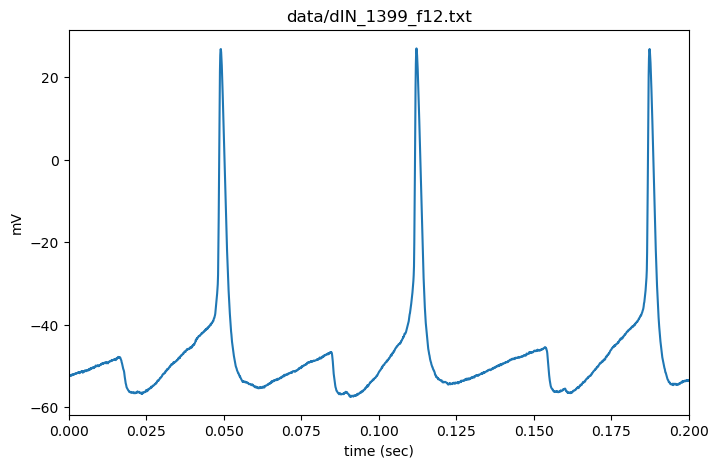

In [25]:
plt.figure(figsize=(8, 5))
plt.xlim(0, 0.2)
plt.xlabel('time (sec)')
plt.ylabel('mV')
plt.title(fname)
plt.plot(ts[:, 0], ts[:, 1])

In [54]:
def get_ts(fname):
    """
    get timeseries from text file
    preprocess the v (which I think is 0.1v, into mV)
    return the two column file as a numpy array of shape (-1, 2)
    """
    print(f"fetching {fname}")
    ts = np.loadtxt(fname)
    # preprocess, some contain mV, some contain V
    #TODO also ignore the time column, and make it from 0 at timestep of 0.1 ms
    # bring everything to mV?
    # the filename contains v, then it is in units of 0.1 volts (i think?)
    hasv = fname.split('_')[1][0] == 'v'
    if hasv:
        ts[:, 1] = ts[:, 1].copy()*100
    return ts

In [55]:
get_ts(files[1])

fetching data/cIN_v128_f8.txt


array([[  1.    , -47.3633],
       [  1.0001, -47.3633],
       [  1.0002, -47.3633],
       ...,
       [  5.9997, -49.8047],
       [  5.9998, -49.8047],
       [  5.9999, -49.8047]])

In [53]:
iter(files).__next__()

'data/dIN_1399_f12.txt'

fetching data/dIN_1399_f12.txt
fetching data/cIN_v128_f8.txt
fetching data/cIN_v120_f4.txt
fetching data/motoneuron_1442_f49.txt
fetching data/aIN_v150_f13.txt
fetching data/cIN_v134_f10.txt
fetching data/motoneuron_1429_f5.txt
fetching data/aIN_v136_f14.txt
fetching data/motoneuron_1443_f5.txt
fetching data/dIN_1401_f5.txt
fetching data/dIN_1402_f5.txt
fetching data/motoneuron_1447_f10.txt
fetching data/cIN_v126_f10.txt
fetching data/aIN_v133_f19.txt
fetching data/aIN_1311_f109.txt
fetching data/cIN_v132_f14.txt
fetching data/motoneuron_1446_f30.txt
fetching data/dIN_1403_f1.txt
fetching data/aIN_v146_f6.txt
fetching data/dIN_1406_f3.txt


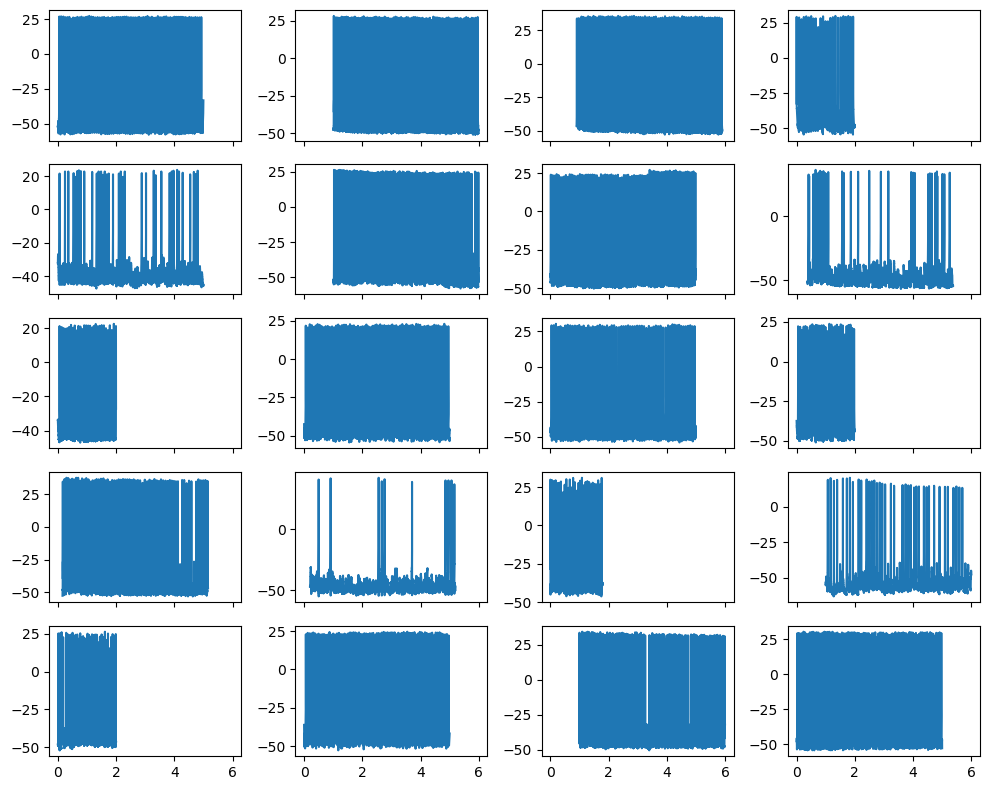

In [66]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(10, 8), sharex=True)
for r in range(5):
    for c in range(4):
        ts = get_ts(files[4*r + c])
        ax[r][c].plot(ts[:, 0], ts[:, 1])
fig.tight_layout()